# Human Remover project for the ISD for collage

## 1. Problem

Identifing if the person is Male OR Female

## 2. Data

The data is from Kaggle
link: https://www.kaggle.com/datasets/yasserhessein/gender-dataset

## 3. Goal

To have 90+% accuracy

## 4. Features

Some information about the data:
* we're dealing with images (unsturctured data), so I'll have to use Deep Learning model
* There are 2 classes ( Male | Female), so it's binary classification
* There are 92.8k files for F, 67.2k for M in the Train file (160k)
* There are 11.5k files for F, 8.5k for M in the Test file (20k)
* There are 13.8k files for F, 8.8k for M in the Validation file (22.6k)

In [19]:
# Importing necessary tools
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [2]:
# check for GPU if available
print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESSS!!!!)


## Getting our data ready:

In [10]:
# Creating variables: 
batch_size = 64
seed=1337
target_size = (150, 150)
epochs=8


In [8]:
data_generator = ImageDataGenerator( rescale = 1.0/255)

train_generator = data_generator.flow_from_directory('../input/gender-dataset/Dataset/Train',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )     

validation_generator =  data_generator.flow_from_directory( '../input/gender-dataset/Dataset/Validation',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [16]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = 3,
                        verbose = 1 ,
                        factor = 0.5,
                        min_lr = 0.0001)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=3)

In [12]:
# Setting up the variables
img_size = 244
input_shape = [None, img_size, img_size, 3] # [batch, height, width, colorChannels(dimensions)]
output_shape = 1 # Male | Female
model_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2"
# Model source: https://www.kaggle.com/models/google/efficientnet-v2

In [13]:
# Creating a fxn which builds a Keras model
def create_model(input_shape=input_shape, output_shape=output_shape, model_url=model_URL):
    # Set up the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units=output_shape,
                       activation="sigmoid") # Layer 2 (output layer)
    ])
    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer= tf.keras.optimizers.Adam(),
        metrics= ["accuracy"]
    )
    # Build the model
    model.build(input_shape)
    
    return model

In [15]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1000)              7200312   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 7,201,313
Trainable params: 1,001
Non-trainable params: 7,200,312
_________________________________________________________________


In [17]:
model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=256,
                           validation_steps=256,
                           epochs=epochs,
                           callbacks=[lrd, mcp, es])

Epoch 1/8
256/256 [==============================] - 382s 1s/step - loss: 0.2510 - accuracy: 0.8980 - val_loss: 0.2108 - val_accuracy: 0.9158
Epoch 2/8
256/256 [==============================] - 266s 1s/step - loss: 0.1967 - accuracy: 0.9221 - val_loss: 0.2122 - val_accuracy: 0.9161
Epoch 3/8
256/256 [==============================] - 233s 912ms/step - loss: 0.1921 - accuracy: 0.9243 - val_loss: 0.2049 - val_accuracy: 0.9180
Epoch 4/8
256/256 [==============================] - 187s 730ms/step - loss: 0.1924 - accuracy: 0.9216 - val_loss: 0.1836 - val_accuracy: 0.9290
Epoch 5/8
256/256 [==============================] - 176s 688ms/step - loss: 0.1861 - accuracy: 0.9271 - val_loss: 0.1997 - val_accuracy: 0.9220
Epoch 6/8
256/256 [==============================] - 164s 640ms/step - loss: 0.1870 - accuracy: 0.9249 - val_loss: 0.1938 - val_accuracy: 0.9244
Epoch 7/8
256/256 [==============================] - 158s 617ms/step - loss: 0.1805 - accuracy: 0.9288 - val_loss: 0.1787 - val_accuracy

[0.99296016]
This  is a female


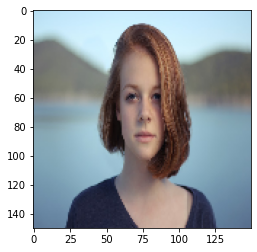

In [18]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = "../input/testmodel/test1.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

[0.]
This is a male


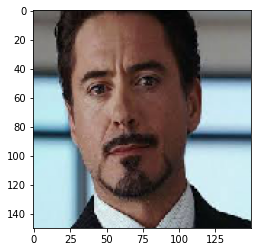

In [22]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = "../input/testmodel/test2.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

In [ ]:
# getting female images
# Training data:
female_img_train_path = "/kaggle/input/gender-dataset/Dataset/Train/Female"
female_images_list = os.listdir(female_img_train_path)
female_img_train = [os.path.join(female_img_train_path, image_name) for image_name in female_images_list]
print("females :", female_img_train[:3], "\n files num(train):", len(female_img_train))
print("------------------------")
# Validation data:
female_img_val_path = "/kaggle/input/gender-dataset/Dataset/Validation/Female"
female_images_val_list = os.listdir(female_img_val_path)
female_img_val = [os.path.join(female_img_val_path, image_name) for image_name in female_images_val_list]
print("Females :", female_img_val[:3], "\n files num(val):", len(female_img_val))

In [4]:
# getting male images
# Training data:
male_img_train_path = "/kaggle/input/gender-dataset/Dataset/Train/Male"
male_images_list = os.listdir(male_img_train_path)
male_img_train = [os.path.join(male_img_train_path, image_name) for image_name in male_images_list]
print("Males :", male_img_train[:3], "\n files num(train):", len(male_img_train))
print("------------------------")
# Validation data:
male_img_val_path = "/kaggle/input/gender-dataset/Dataset/Validation/Male"
male_images_val_list = os.listdir(male_img_val_path)
male_img_val = [os.path.join(male_img_val_path, image_name) for image_name in male_images_val_list]
print("Males :", male_img_val[:3], "\n files num(val):", len(male_img_val))

Males : ['/kaggle/input/gender-dataset/Dataset/Train/Male/083648.jpg', '/kaggle/input/gender-dataset/Dataset/Train/Male/125778.jpg', '/kaggle/input/gender-dataset/Dataset/Train/Male/059339.jpg'] 
 files num(train): 67155
------------------------
Males : ['/kaggle/input/gender-dataset/Dataset/Validation/Male/190781.jpg', '/kaggle/input/gender-dataset/Dataset/Validation/Male/197881.jpg', '/kaggle/input/gender-dataset/Dataset/Validation/Male/185161.jpg'] 
 files num(val): 8820


# preparing the images (Turining images into Tensors)


In [5]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
numM_image_train = imread(male_img_train[42])
numF_image_train = imread(female_img_train[0])

print(numM_image_train.shape) # (width, heigth, dimensions)
print(len(numM_image_train), len(numF_image_train))

(218, 178, 3)
218 218


In [6]:
print(numM_image_train.max(), numM_image_train.min())

255 0


In [7]:
# Turning images into tensors
tf.constant(numM_image_train)[:2]

<tf.Tensor: shape=(2, 178, 3), dtype=uint8, numpy=
array([[[ 56,  88, 249],
        [ 57,  89, 250],
        [ 61,  90, 252],
        ...,
        [ 42,  79, 255],
        [ 37,  78, 254],
        [ 37,  78, 254]],

       [[ 56,  88, 249],
        [ 57,  89, 250],
        [ 61,  90, 252],
        ...,
        [ 42,  79, 255],
        [ 37,  78, 254],
        [ 37,  78, 254]]], dtype=uint8)>

## making the Function:

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an iamge filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (jpg) into Tensors
4. Normalize the `image` (color channels values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (244, 244)
6. Return the modified `image`

In [8]:
img_size = 244

def process_img(image_path, image_size = img_size):
    """
    Takes the image file path & turn the image into tensor
    """
    # Read in an image path
    image = tf.io.read_file(image_path)
    # Turn the jpeg img into numarical Tensor with 3 color channels (RBG)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the color channels values from 0-255 to 0-1 values (normalization process)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to (244, 244)
    image = tf.image.resize(image, size=[img_size, img_size])
    return image

# Turning our data into Batches:
Why turn data into Batches?
Let's say you're trying to process 10,000+ images in one go.. they might not fit in the memory.

So that's why we do about 32 (this is batch size) images at a time.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`

In [9]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    image = process_img(image_path)
    return image, label


#### Create a function for all of our data ( `female_img_train`, `male_img_train` ) to be in the form of `(image, label)` which is the batches!

In [10]:
batch_size = 32

# function to turn data into batches
def create_data_batches(x, y=None, batch_size=batch_size, valid_data=False, test_data=False):
    """
    Create batches of data out of images (x) & labels (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accept test data as input (no labels).
    """
    # If the data is test dataset, so we don't have labels
    if test_data:
        print("Creating Test data Batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only file path (NO labels)
        data_batch = data.map(process_img).batch(batch_size)
        return data_batch
    
    # If data is valid dataset, there's no need to shuffle
    elif valid_data:
        print("Creating Validation data Batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # File path
                                                   tf.constant(y))) # Labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
    
    else:
        print("Creating Training data Batches...")
        # Turn filepath & labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), 
                                                   tf.constant(y))) 
        # Shuffling the pathnames (female_img_train, male_img_train) & labels before mapping image processor fxn is faster than shuffling images
        data  = data.shuffle(buffer_size=len(x))
        
        # Create (image, label) tuples 
        data = data.map(get_image_label)
        
        # Turn training data into batches
        data_batch = data.batch(batch_size)
        return data_batch

# Creating train & validation data Batches

In [11]:
# Females:
train_female_data_batch = create_data_batches(female_img_train, tf.zeros(shape=(len(female_img_train),)) )
val_female_data_batch = create_data_batches(female_img_val, tf.zeros(shape=(len(female_img_val),)), valid_data=True)

Creating Training data Batches...
Creating Validation data Batches...


In [12]:
# Males:
train_male_data_batch = create_data_batches(male_img_train, tf.ones(shape=(len(male_img_train),)) )
val_male_data_batch = create_data_batches(male_img_val, tf.ones(shape=(len(male_img_val),)), valid_data=True)

Creating Training data Batches...
Creating Validation data Batches...


In [13]:
# checking out the different attributes of our data batches
# Females:
print("Females:")
print("Training:", train_female_data_batch, "\n Validation:", val_female_data_batch)
print("Males:")
print("Training:", train_male_data_batch, "\n Validation:", val_male_data_batch)

# shapes: ((None, 244, 244, 3))
#        batchSize,Width,Height,Dimensions

Females:
Training: <BatchDataset shapes: ((None, 244, 244, 3), (None,)), types: (tf.float32, tf.float32)> 
 Validation: <BatchDataset shapes: ((None, 244, 244, 3), (None,)), types: (tf.float32, tf.float32)>
Males:
Training: <BatchDataset shapes: ((None, 244, 244, 3), (None,)), types: (tf.float32, tf.float32)> 
 Validation: <BatchDataset shapes: ((None, 244, 244, 3), (None,)), types: (tf.float32, tf.float32)>


# Visualizing our data

In [14]:
import matplotlib.pyplot as plt
# Create a fxn to view the img in the data batch
def show_25_image(images, labels):
    plt.figure(figsize=(10, 10))
    # Loop through 25 images
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1) # (row,column,index)
        # Display the image
        plt.imshow(images[i])
        if labels[i] == 0:
            plt.title("Female")
        else:
            plt.title("Male")
        plt.axis("off")

In [19]:
# Visualizing data in a training batch
# Female:
train_female_images, train_female_labels = next(train_female_data_batch.as_numpy_iterator())
len(train_female_images), len(train_female_labels)
# Male:
train_male_images, train_male_labels = next(train_male_data_batch.as_numpy_iterator())
len(train_male_images), len(train_male_labels)

# Run this Cell here to change the Images

(32, 32)

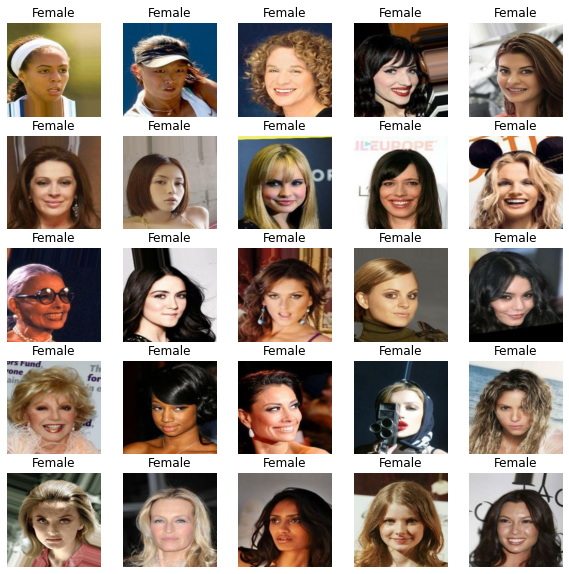

In [20]:
show_25_image(train_female_images, train_female_labels)

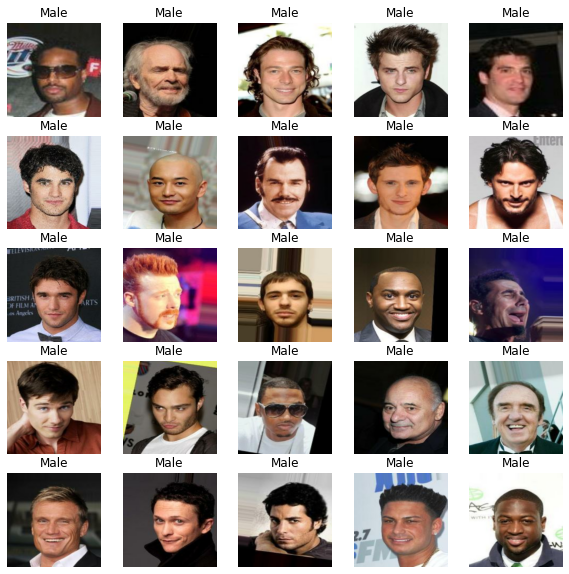

In [17]:
show_25_image(train_male_images, train_male_labels)

# Bulding a model:

Before we build a model, there are few things we need to define:
* The input shape (image shape in the form of Tensors) to our model.
* The output shape (image labels in the form of Tensors) of our model.
* The URL of the model we want to use. (Transfer Learning)


In [15]:
base_model = tf.keras.applications.VGG16(input_shape=(244, 244, 3),include_top=False,weights="imagenet")
# Freezing Layers

for layer in base_model.layers[:-20]:
    layer.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [14]:
# Setting up the variables
img_size = 244
input_shape = [None, img_size, img_size, 3] # [batch, height, width, colorChannels(dimensions)]
output_shape = 1 # Male | Female
model_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2"
# Model source: https://www.kaggle.com/models/google/efficientnet-v2

### Creating a function that will do:

* Take the above variables as parameters.
* Define the layers in Keras model in sequential fashion (Do this first, then this, then that)
* Compiles the model (says it should be evaluated & improved)
* Builds the model (tells the model the input shape it'll be getting)
* Returns the model

In [16]:
# Creating a fxn which builds a Keras model
def create_model(input_shape=input_shape, output_shape=output_shape, model_url=model_URL):
    # Set up the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units=output_shape,
                       activation="sigmoid") # Layer 2 (output layer)
    ])
    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer= tf.keras.optimizers.Adam(),
        metrics= ["accuracy"]
    )
    # Build the model
    model.build(input_shape)
    
    return model

In [17]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1000)              7200312   
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 7,201,313
Trainable params: 1,001
Non-trainable params: 7,200,312
_________________________________________________________________


# Creating the training function for our model:
<!-- #@parm {type:"slider", min:10, max:100, step:10} -->

In [18]:
# epochs: number of times the model is allowed to look at the training data
epochs = 100 

In [19]:
# Training function:
def train_model(model=model):
    # Fit the model
    model.fit(x= train_female_data_batch,
              epochs= epochs,
              validation_data= val_female_data_batch,
              validation_freq= 1)
    model.fit(x= train_male_data_batch,
              epochs= epochs,
              validation_data= val_male_data_batch,
              validation_freq= 1)
    return model

In [ ]:
# Fit the model to the data
model = train_model()

Epoch 1/100
1192/2902 [===========>..................] - ETA: 16:37 - loss: 0.0031 - accuracy: 0.9985